In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
dataset = pd.read_csv(r"D:\MIT ADT\ML Lab\titanic dataset\titanic_train.csv")

In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
dataset.drop(['Name','Ticket','SibSp','PassengerId'],axis='columns', inplace=True)

In [17]:
print(dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [18]:
print(dataset)

     PassengerId  Survived  Pclass     Sex   Age  Parch     Fare Embarked
0              1         0       3    male  22.0      0   7.2500        S
1              2         1       1  female  38.0      0  71.2833        C
2              3         1       3  female  26.0      0   7.9250        S
3              4         1       1  female  35.0      0  53.1000        S
4              5         0       3    male  35.0      0   8.0500        S
..           ...       ...     ...     ...   ...    ...      ...      ...
886          887         0       2    male  27.0      0  13.0000        S
887          888         1       1  female  19.0      0  30.0000        S
888          889         0       3  female   NaN      2  23.4500        S
889          890         1       1    male  26.0      0  30.0000        C
890          891         0       3    male  32.0      0   7.7500        Q

[891 rows x 8 columns]


In [19]:
dataset.drop('PassengerId',axis='columns', inplace=True)

In [20]:
dataset.shape

(891, 7)

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])

In [26]:
dataset.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,0,7.2500,2
1,1,1,0,38.0,0,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,0,53.1000,2
4,0,3,1,35.0,0,8.0500,2


In [41]:
dataset['Age'] = dataset['Age'].fillna(value=dataset['Age'].mean())

In [42]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X = dataset.iloc[:,1:7]

In [45]:
Y = dataset['Survived']

In [46]:
X_std=scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test= train_test_split(X_std,Y,test_size=0.3,random_state=0)

In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,200),activation='relu')

In [50]:
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(150, 200))

In [51]:
mlp.score(x_train,y_train)*100

86.8378812199037

In [52]:
mlp.score(x_test,y_test)*100

81.34328358208955

In [58]:
mlp = MLPClassifier(hidden_layer_sizes=(150,200),activation='relu',solver='adam')

In [59]:
mlp.fit(x_train,y_train)

D:\MIT ADT\New folder\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150, 200))

In [60]:
mlp.score(x_train,y_train)*100

86.51685393258427

In [61]:
mlp.score(x_test,y_test)*100

82.46268656716418

In [65]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [66]:
y_pred=mlp.predict(x_test)

In [67]:
print(y_pred)

[0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0]


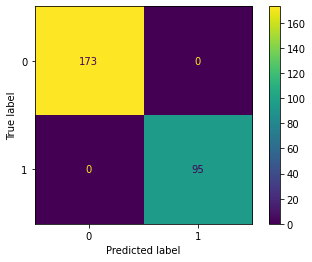

In [68]:
plot_confusion_matrix(mlp,x_test,y_pred)

In [69]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       168
           1       0.78      0.74      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

